In [2]:
import pandas as pd 
import os
import mpbn
os.chdir('/home/spankaew/Git/BooleanBenchmark')
import logic_ensemble as le

/home/spankaew/anaconda3/envs/network_analysis/lib/python3.10/site-packages/tslearn/bases/bases.py:15: UserWarning: h5py not installed, hdf5 features will not be supported.
Install h5py to use hdf5 features: http://docs.h5py.org/
  warn(h5py_msg)


In [3]:
model_path = '/home/spankaew/Git/BooleanBenchmark/models/dev/BN_TUTO_init+Fx/'
model = le.LogicEnsemble(model_path, project_name = 'BN_TUTO_init+Fx')
model.create_logic()
model.logic.create_hash()

Loading models logics


100%|██████████| 2240/2240 [00:02<00:00, 1021.33it/s]


Concatenate results into matrix


100%|██████████| 2240/2240 [00:34<00:00, 65.83it/s] 


Logic object created
Convert model logics to hash


100%|██████████| 2240/2240 [00:04<00:00, 537.87it/s]

Hash of models created


In [4]:
model_path = '/home/spankaew/Git/BooleanBenchmark/models/dev/BN_TUTO_init+t+Fx+Zero/'
model_2 = le.LogicEnsemble(model_path, project_name = 'BN_TUTO_init+t+Fx+Zero')
model_2.create_logic()
model_2.logic.create_hash()

Loading models logics


100%|██████████| 1120/1120 [00:00<00:00, 1163.29it/s]


Concatenate results into matrix


100%|██████████| 1120/1120 [00:07<00:00, 157.13it/s]


Logic object created
Convert model logics to hash


100%|██████████| 1120/1120 [00:02<00:00, 522.29it/s]

Hash of models created


In [5]:
model_path = '/home/spankaew/Git/BooleanBenchmark/models/dev/BN_TUTO_init+t+Fx+Zero+UnivConstraints/'
model_3 = le.LogicEnsemble(model_path, project_name = 'BN_TUTO_init+t+Fx+Zero+UnivConstraints')
model_3.create_logic()
model_3.logic.create_hash()

Loading models logics


100%|██████████| 88/88 [00:00<00:00, 851.22it/s]


Concatenate results into matrix


100%|██████████| 88/88 [00:00<00:00, 1699.22it/s]


Logic object created
Convert model logics to hash


100%|██████████| 88/88 [00:00<00:00, 482.21it/s]

Hash of models created


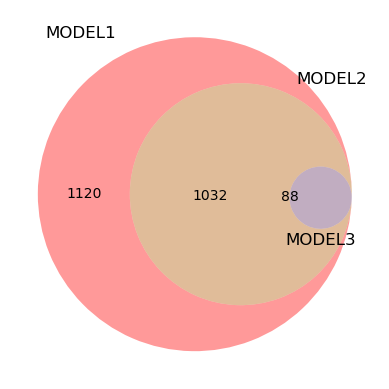

In [6]:
from matplotlib_venn import venn3
import matplotlib.pyplot as plt

venn3([set(list(model.logic.hash_models)),
       set(list(model_2.logic.hash_models)),
       set(list(model_3.logic.hash_models))],
       set_labels = ('MODEL1','MODEL2','MODEL3'))

plt.show()

In [7]:
model1_hash = set(list(model.logic.hash_models))
model2_hash = set(list(model_2.logic.hash_models))
model3_hash = set(list(model_3.logic.hash_models))

model1_specific = list(model1_hash - model2_hash - model3_hash)
model2_specific = list(model2_hash - model3_hash)
model3_specific = list(model3_hash)

In [8]:
model.logic.create_flattend_logic_clause()

Flatten models logic clauses


100%|██████████| 2240/2240 [00:00<00:00, 3430171.95it/s]


Concatenate results into matrix


100%|██████████| 2240/2240 [00:37<00:00, 60.52it/s] 

Flattend logic clause created


In [9]:
color_model1 = pd.DataFrame(model1_specific)
color_model1.columns = ['hash']
color_model1['constraint'] = 'Model1_specific'
color_model1_dict = color_model1.set_index('hash')['constraint'].to_dict()

color_model2 = pd.DataFrame(model2_specific)
color_model2.columns = ['hash']
color_model2['constraint'] = 'Model2_specific'
color_model2_dict = color_model2.set_index('hash')['constraint'].to_dict()

color_model3 = pd.DataFrame(model3_specific)
color_model3.columns = ['hash']
color_model3['constraint'] = 'Model3_specific'
color_model3_dict = color_model3.set_index('hash')['constraint'].to_dict()

In [10]:
model_color = model.logic.hash_models

# Replace color
model_color = model_color.replace(color_model1_dict)
model_color = model_color.replace(color_model2_dict)
model_color = model_color.replace(color_model3_dict)

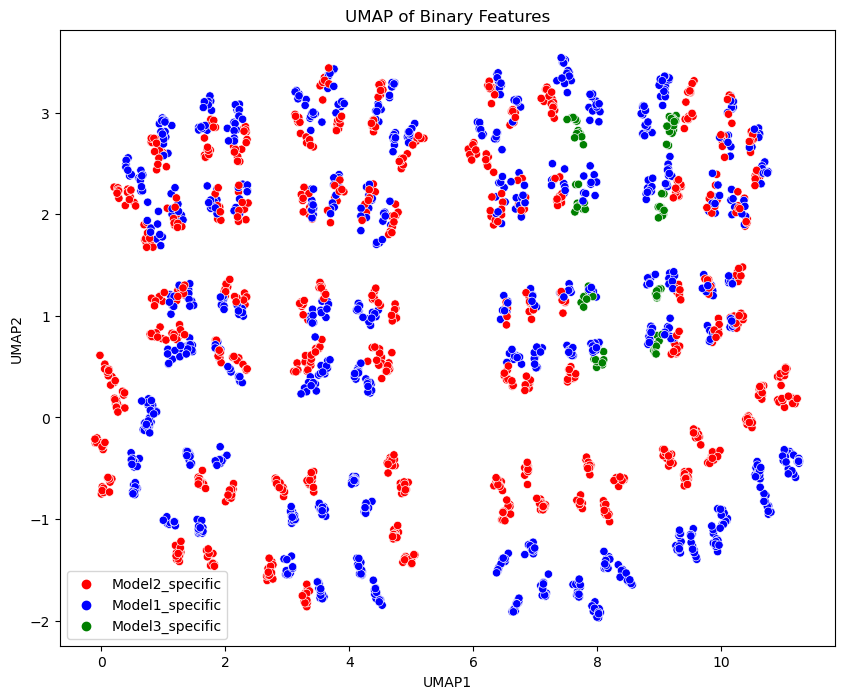

In [11]:
import umap
import matplotlib.pyplot as plt
import seaborn as sns

binary_features = model.logic.logic_clause_flattend.transpose()

# Generate UMAP
reducer = umap.UMAP()
embedding = reducer.fit_transform(binary_features)

# Convert to DataFrame for easier plotting
embedding_df = pd.DataFrame(embedding, columns=['UMAP1', 'UMAP2'])
embedding_df.index = binary_features.index

# Plot the UMAP
plt.figure(figsize=(10, 8))
sns.scatterplot(x='UMAP1', y='UMAP2', data=embedding_df, hue=model_color, palette=['red', 'blue', 'green'], legend='full')
plt.title('UMAP of Binary Features')
plt.show()

In [13]:
model_color

bn_2226    Model2_specific
bn_411     Model1_specific
bn_361     Model2_specific
bn_1670    Model1_specific
bn_1151    Model1_specific
                ...       
bn_1021    Model2_specific
bn_1945    Model1_specific
bn_2059    Model1_specific
bn_1332    Model1_specific
bn_1909    Model2_specific
Length: 2240, dtype: object

In [20]:
model_color_2 = model_color.copy()
model_color_2 = model_color_2.replace({'Model1_specific':'blue',
                                        'Model2_specific':'green',
                                        'Model3_specific':'red'}) 
model_color_2 = model_color_2.sort_values()
sort_index = model_color_2.index

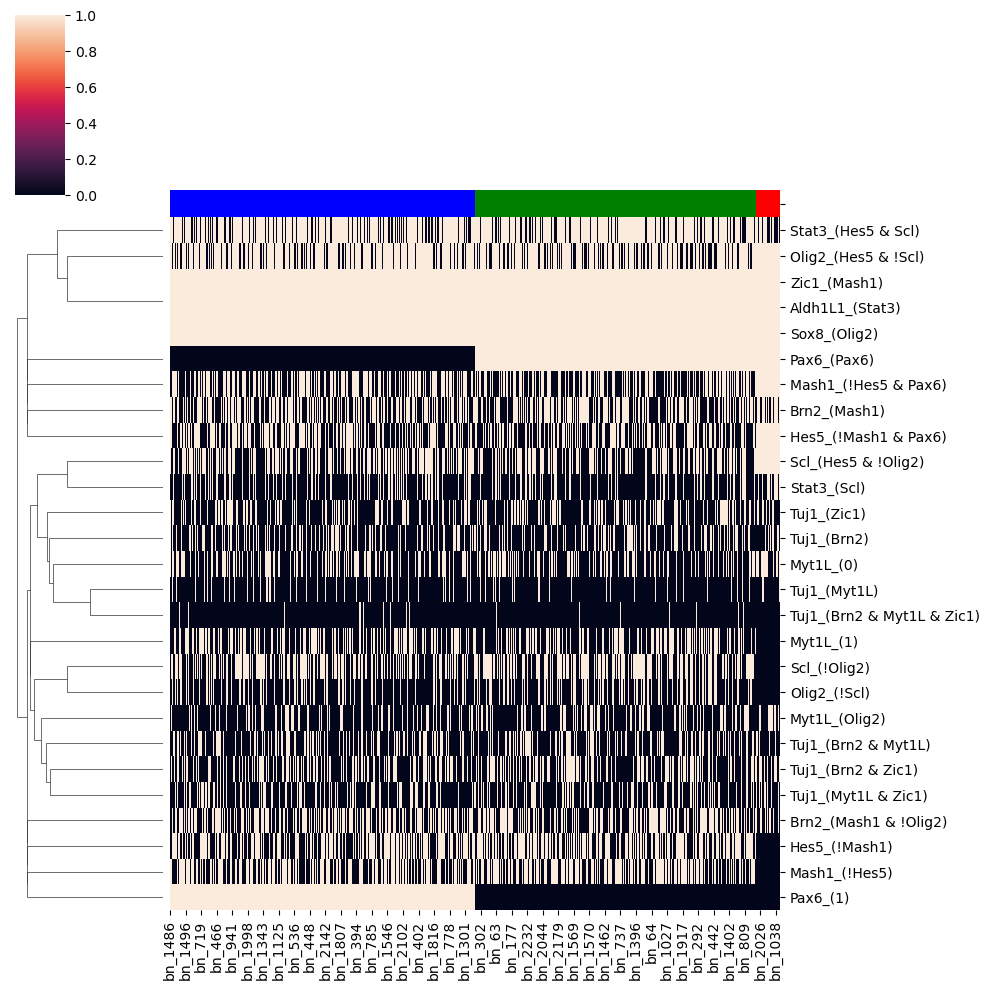

In [21]:
import seaborn as sns

# Create a clustermap with column colors based on model_color
sns.clustermap(model.logic.logic_clause_flattend[sort_index], col_colors=model_color_2, col_cluster=False)